# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

# Import Statements

In [3]:
import pandas as pd 

<img src="data/assets/lego_themes.png">

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [16]:
df = pd.read_csv('data/data/colors.csv', names=["ID","COLOR","RGB","TRANS_OR_NO_TRANS"], header=0)

In [28]:
df.tail()

,ID,COLOR,RGB,TRANS_OR_NO_TRANS
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f
134,9999,[No Color],05131D,f


In [29]:
df["COLOR"].nunique()

135

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [34]:
df[df["TRANS_OR_NO_TRANS"]=="t"].count()

ID                   28
COLOR                28
RGB                  28
TRANS_OR_NO_TRANS    28
dtype: int64

In [46]:
new_list = list(df["COLOR"][df["TRANS_OR_NO_TRANS"]=="f"])

In [48]:
new_list

['Unknown',
 'Black',
 'Blue',
 'Green',
 'Dark Turquoise',
 'Red',
 'Dark Pink',
 'Brown',
 'Light Gray',
 'Dark Gray',
 'Light Blue',
 'Bright Green',
 'Light Turquoise',
 'Salmon',
 'Pink',
 'Yellow',
 'White',
 'Light Green',
 'Light Yellow',
 'Tan',
 'Light Violet',
 'Glow In Dark Opaque',
 'Purple',
 'Dark Blue-Violet',
 'Orange',
 'Magenta',
 'Lime',
 'Dark Tan',
 'Bright Pink',
 'Medium Lavender',
 'Lavender',
 'Chrome Antique Brass',
 'Chrome Blue',
 'Chrome Green',
 'Chrome Pink',
 'Chrome Black',
 'Very Light Orange',
 'Light Purple',
 'Reddish Brown',
 'Light Bluish Gray',
 'Dark Bluish Gray',
 'Medium Blue',
 'Medium Green',
 'Speckle Black-Copper',
 'Speckle DBGray-Silver',
 'Light Pink',
 'Light Flesh',
 'Milky White',
 'Metallic Silver',
 'Metallic Green',
 'Metallic Gold',
 'Medium Dark Flesh',
 'Dark Purple',
 'Dark Flesh',
 'Royal Blue',
 'Flesh',
 'Light Salmon',
 'Violet',
 'Blue-Violet',
 'Medium Lime',
 'Aqua',
 'Light Lime',
 'Light Orange',
 'Speckle Black-Silv

In [38]:
df["TRANS_OR_NO_TRANS"].value_counts()["f"]

107

In [37]:
df["TRANS_OR_NO_TRANS"].value_counts()["t"]

28

In [39]:
df.groupby('TRANS_OR_NO_TRANS').count()

,ID,COLOR,RGB
TRANS_OR_NO_TRANS,,,
f,107,107,107
t,28,28,28


In [40]:
df.TRANS_OR_NO_TRANS.value_counts()

f    107
t     28
Name: TRANS_OR_NO_TRANS, dtype: int64

### Understanding LEGO Themes vs. LEGO Sets

**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

<img src='data/assets/lego_themes.png'>

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png 

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [129]:
import pandas as pd 

In [130]:
df = pd.read_csv('data/data/sets.csv')

In [131]:
df.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [132]:
df_year = df.sort_values('year')

In [133]:
df_year.head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [134]:
df_year['num_parts'][df_year['year']==1949].count()

5

**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [135]:
df_parts = df.sort_values('num_parts')
df_parts

,set_num,name,year,theme_id,num_parts
8878,65573-1,Rumble Racers,2005,116,0
6599,5004264-1,1x2 Brick Key Light (Red),2014,503,0
6600,5004266-1,LEGO Mini Box (Yellow),2014,501,0
6601,5004267-1,Single Stud Red Storage Brick,2014,501,0
6602,5004268-1,Single Stud Blue Storage Brick,2014,501,0
...,...,...,...,...,...
221,10189-1,Taj Mahal,2008,673,5922
295,10256-1,Taj Mahal,2017,673,5923
10551,71043-1,Hogwarts Castle,2018,246,6020
11183,75192-1,UCS Millennium Falcon,2017,171,7541


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [152]:
set_by_year = df_year.groupby('year').agg('count')

In [153]:
set_by_year

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


In [141]:
set_by_year['set_num'].head()

KeyError: 'set_num'

In [145]:
set_by_year

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


In [146]:
df_year['set_num'][df_year['year']==2019].count()

840

In [147]:
df_year['set_num'][df_year['year']==1955].count()

28

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

In [148]:
import matplotlib.pyplot as plt

In [149]:
set_by_year.tail()

,set_num,name,theme_id,num_parts
year,,,,
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840
2020,674,674,674,674
2021,3,3,3,3


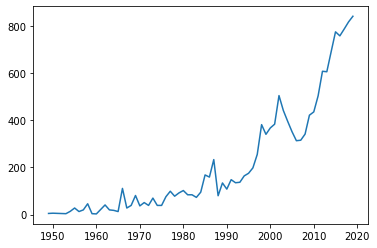

In [150]:
plt.plot(set_by_year.index[:-2], set_by_year.set_num[:-2])

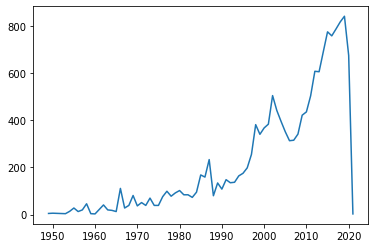

In [151]:
plt.plot(set_by_year.index, set_by_year.set_num)

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [158]:
themes_by_year = df.groupby("year").agg({'theme_id':pd.Series.nunique})

In [160]:
themes_by_year

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

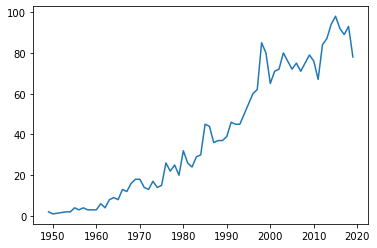

In [166]:
plt.plot(themes_by_year.index[:-2], themes_by_year.theme_id[:-2])

### Line Charts with Two Seperate Axes

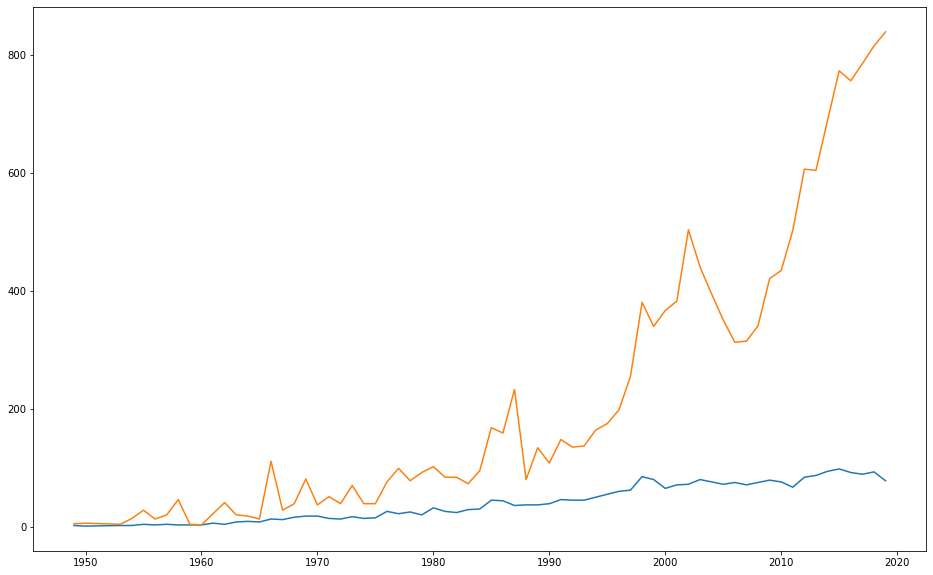

In [167]:
plt.figure(figsize=(16,10))
plt.plot(themes_by_year.index[:-2], themes_by_year.theme_id[:-2])
plt.plot(set_by_year.index[:-2], set_by_year.set_num[:-2])

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

Text(0, 0.5, 'Number of Themes')

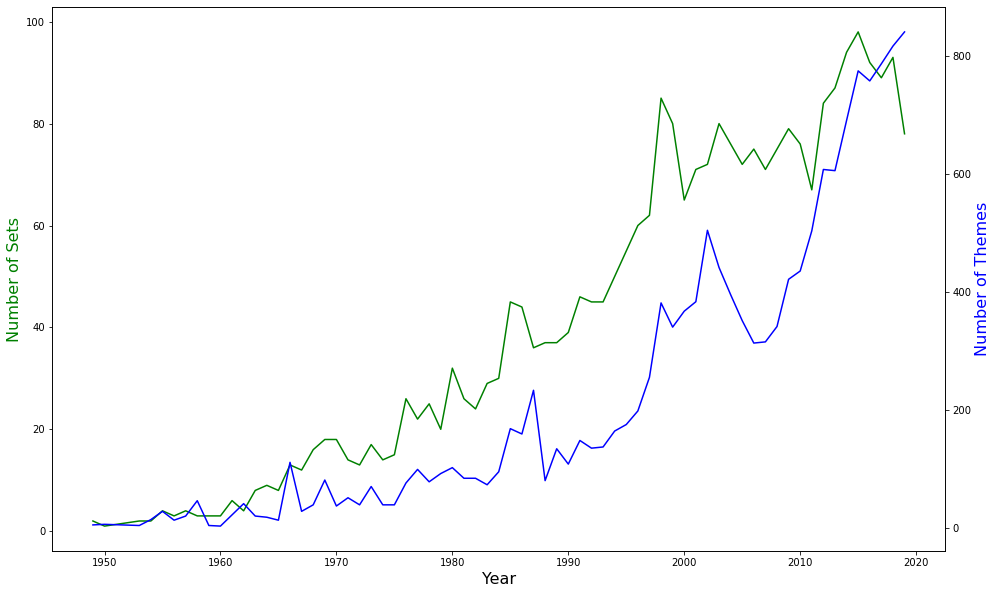

In [173]:
plt.figure(figsize=(16,10))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(themes_by_year.index[:-2], themes_by_year.theme_id[:-2], color='g')
ax2.plot(set_by_year.index[:-2], set_by_year.set_num[:-2], 'b')
ax1.set_xlabel('Year',fontsize=16)
ax1.set_ylabel('Number of Sets', color='green', fontsize=16)
ax2.set_ylabel('Number of Themes', color='blue',fontsize=16)

In [ ]:
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='green')
ax2.set_ylabel('Number of Themes', color='blue')

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

In [180]:
parts_per_year = df.groupby("year").agg({'num_parts':pd.Series.mean})

In [181]:
parts_per_year

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


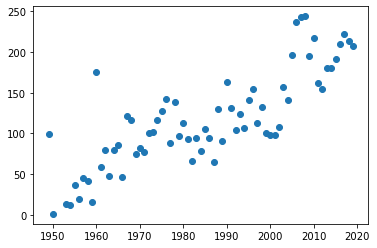

In [182]:
plt.scatter(parts_per_year.index[:-2], parts_per_year.num_parts[:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

<img src="https://i.imgur.com/Sg4lcjx.png">

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [184]:
themes = pd.read_csv("data/data/themes.csv")

In [185]:
themes.head

<bound method NDFrame.head of       id                   name  parent_id
0      1                Technic        NaN
1      2         Arctic Technic        1.0
2      3            Competition        1.0
3      4         Expert Builder        1.0
4      5                  Model        1.0
..   ...                    ...        ...
591  705               Iron Man      696.0
592  706             Spider-Man      696.0
593  707                  X-Men      696.0
594  708  The LEGO Batman Movie      697.0
595  709               LEGO Art        NaN

[596 rows x 3 columns]>

Why would Star Wars have so many different themes? We can check which products corresponded to those themes in the sets.csv:

In [196]:
sets = pd.read_csv("data/data/sets.csv")

In [197]:
sets[sets.theme_id == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


Star Wars is a really long-running franchise. Theme number 18 was running from 2000 to 2002 and seems to be comprised of several of the show's characters. What about, say theme 209?

In [198]:
sets[sets.theme_id == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


### Merging (i.e., Combining) DataFrames based on a Key


In [203]:
set_theme_count = sets["theme_id"].value_counts()
set_theme_count[:5]

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

In [204]:
set_theme_count = pd.DataFrame ({'id': set_theme_count.index,
                                'set_count':set_theme_count.values})

In [205]:
set_theme_count

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329
...,...,...
566,210,1
567,455,1
568,383,1
569,245,1


In [206]:
merged_df = pd.merge(set_theme_count, themes, on='id')
merged_df[:3]

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN


<BarContainer object of 10 artists>

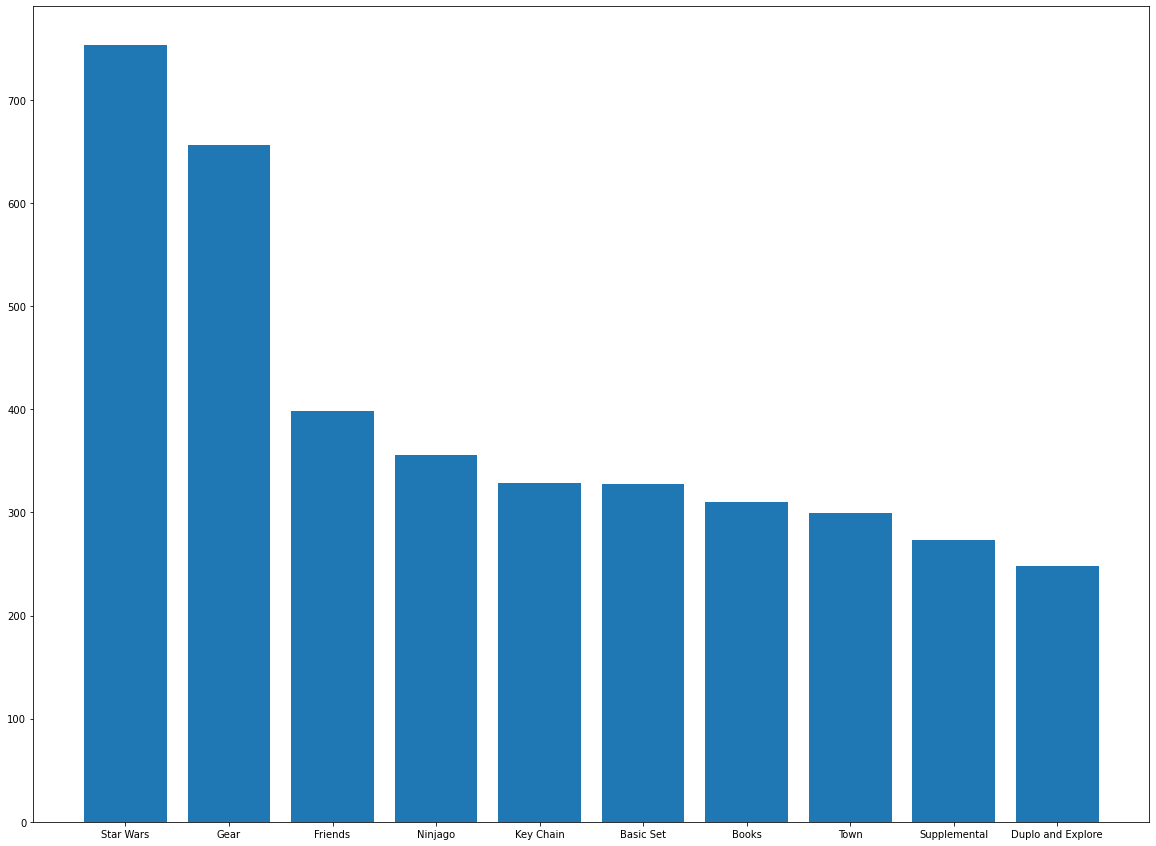

In [210]:
plt.figure(figsize =(20,15))
plt.bar(merged_df.name[:10], merged_df.set_count[:10])

Niiiiice.😌 So what can we see here? Well, a couple of these themes like Star Wars, Town, or Ninjago are what I would think of when I think of LEGO. However, it looks like LEGO also produces a huge number of ... books and key chains?!?! I guess I'm showing my age here, but it's interesting that the LEGO company seems to produce so much more these days than just plastic bricks. The 'Gear' category itself is huge and includes everything from bags to pencil cases apparently. Has LEGO strayed from its core business or is it successfully diversifying? That we can't answer from our dataset. I'll leave that one up to a business school case study to decide.